<a href="https://colab.research.google.com/github/simulate111/mini-project-1/blob/main/Mini_project1_(1)_Samuel%20Jaari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPARATION

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the filename of the uploaded CSV
df = pd.read_csv('https://raw.githubusercontent.com/simulate111/mini-project-1/main/bank-additional-full.csv', sep=';')


In [3]:

# Cleaning functions for each column as per guidelines

job_categories = ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
marital_categories = ['divorced', 'married', 'single', 'unknown']
education_categories = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
default_housing_loan_categories = ['no', 'yes', 'unknown']
contact_categories = ['cellular', 'telephone']
month_categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_of_week_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
poutcome_categories = ['failure', 'nonexistent', 'success']

# 1. Clean 'job' Column
df['job'] = df['job'].apply(lambda x: x if x in job_categories else 'unknown')

# 2. Clean 'marital' Column
df['marital'] = df['marital'].apply(lambda x: x if x in marital_categories else 'unknown')

# 3. Clean 'education' Column
df['education'] = df['education'].apply(lambda x: x if x in education_categories else 'unknown')

# 4. Clean 'default', 'housing', 'loan' Columns
for col in ['default', 'housing', 'loan']:
    df[col] = df[col].apply(lambda x: x if x in default_housing_loan_categories else 'unknown')

# 5. Clean 'contact' Column
df['contact'] = df['contact'].apply(lambda x: x if x in contact_categories else 'unknown')

# 6. Clean 'month' Column
df['month'] = df['month'].apply(lambda x: x.lower() if x.capitalize() in month_categories else 'unknown')

# 7. Clean 'day_of_week' Column
df['day_of_week'] = df['day_of_week'].apply(lambda x: x if x in day_of_week_categories else 'unknown')


# 9. Ensure Numeric Columns are Correctly Formatted
numeric_cols = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 10. Clean 'poutcome' Column
df['poutcome'] = df['poutcome'].apply(lambda x: x if x in poutcome_categories else 'unknown')

# 11. Clean Output Variable 'y'
df['y'] = df['y'].apply(lambda x: x if x in ['yes', 'no'] else 'unknown')
# Convert the 'y' column to boolean (True for 'yes', False for 'no')
df['y'] = df['y'].map({'yes': True, 'no': False})

# After cleaning
print(df.head())

#check for missing values
print(df.isnull().sum())

column_types = df.dtypes

# Print the data types
print(column_types)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

     month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  unknown         mon  ...         1    999         0  nonexistent   
1  unknown         mon  ...         1    999         0  nonexistent   
2  unknown         mon  ...         1    999         0  nonexistent   
3  unknown         mon  ...         1    999         0  nonexistent   
4  unknown         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed      y  
0          1.1          93.994       

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,unknown,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,unknown,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,unknown,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,unknown,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,unknown,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,unknown,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,unknown,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,unknown,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,unknown,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


#ML TRAINING

Logistic Regression - A linear model for classification.

Random Forest Classifier - A powerful ensemble method based on decision trees.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

X = df.drop('y', axis=1)  # Features
y = df['y']  # Target

# Encoding categorical variables (if any)
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a pipeline that processes the data and then fits the logistic regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LogisticRegression(max_iter=1000, random_state=0))])

# Train the logistic regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")


Logistic Regression Accuracy: 0.91


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline that processes the data and then fits the random forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(n_estimators=100, random_state=0))])

# Train the random forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")


Random Forest Classifier Accuracy: 0.92


#Visulization

Confusion Matrix

ROC Curve and AUC



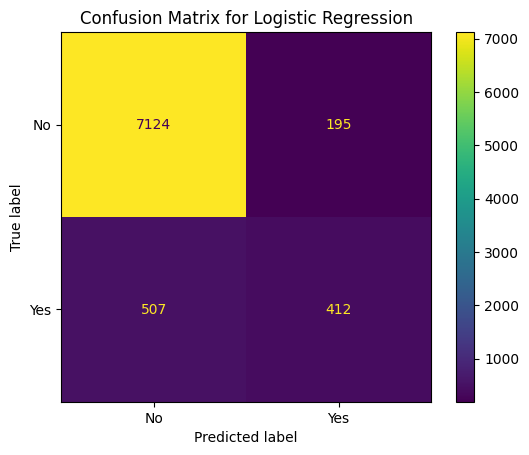

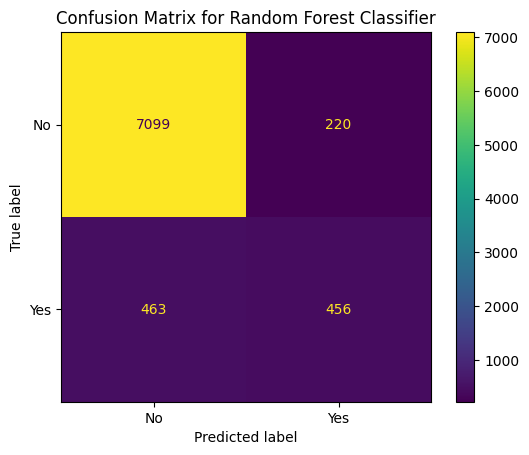

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# For Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, lr_predictions, display_labels=['No', 'Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# For Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, display_labels=['No', 'Yes'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


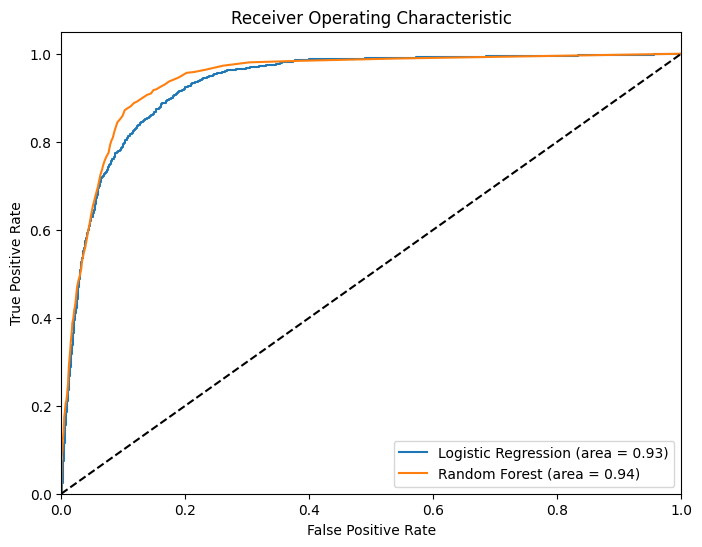

In [9]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Compute ROC curve and ROC area for each class for Logistic Regression
lr_probs = lr_pipeline.predict_proba(X_test)
lr_auc = auc(*roc_curve(y_test, lr_probs[:, 1])[:2])

# Compute ROC curve and ROC area for each class for Random Forest
rf_probs = rf_pipeline.predict_proba(X_test)
rf_auc = auc(*roc_curve(y_test, rf_probs[:, 1])[:2])

# Plot ROC curve for both models
plt.figure(figsize=(8, 6))
for model, probs, auc_score, label in zip(
    [lr_pipeline, rf_pipeline], [lr_probs, rf_probs], [lr_auc, rf_auc],
    ['Logistic Regression', 'Random Forest']):
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
    plt.plot(fpr, tpr, label=f'{label} (area = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
